In [1]:
import os
import sys
import importlib

os.environ["JAX_ENABLE_X64"] = "true"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
os.environ['ENABLE_PJRT_COMPATIBILITY'] = 'false'
os.environ["JAX_PLATFORMS"] = "cpu"

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
font_axis_label = 16

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    'font.size': 12
})

In [3]:
import src
importlib.import_module(f'src')
for module in dir(src):
    if '__' not in module:
        print(module)
        importlib.import_module(f'src.{module}')
        importlib.reload(sys.modules[f'src.{module}'])
        
from src.theory_utils_spectral import SVR_th_spectral
from src.experiments import experiment_toy

In [4]:
P, N, grid_size, num_trials = 800, 25, 1, 25

corr_list = [0.667]
noise_list = [1.0]
epsilon_list = np.array([-1, -2, 0.5, 0])
alpha_list = np.arange(0.1, 5, 0.3)

grid_size = len(corr_list)

centroid_seed = 42
lamb = 1e-18
fn_list = ['linsvr2']

overwrite = False
plot_fig = False

alldata_file = f'all_data_toy_new_P_{P}_N_{N}_grid_{grid_size}'\
    f'_centroid_seed_{centroid_seed}_lamb_{lamb:.1e}_fn_{str(fn_list)}.npz'
    
if os.path.exists('./results/'+alldata_file) and not overwrite:
    data = np.load('./results/'+alldata_file, allow_pickle=True)['data'].tolist()
else:
    data = experiment_toy(P=P,
                          N=N,
                          centroid_seed=centroid_seed,
                          grid_size=grid_size,
                          num_trials=num_trials,
                          overwrite=overwrite,
                          plot_fig=plot_fig,
                          SVR_th=SVR_th_spectral,
                          corr_list=corr_list,
                          noise_list=noise_list,
                          epsilon_list=epsilon_list,
                          alpha_list=alpha_list,
                          lamb=lamb,
                          fn_list=fn_list)

returns = data[corr_list[0]][noise_list[0]]

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


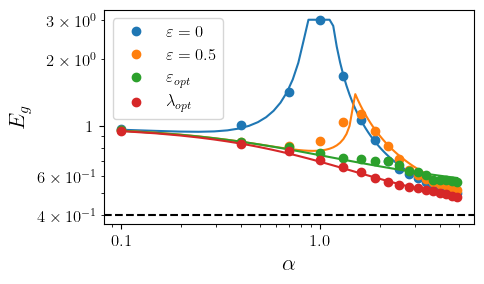

In [5]:
alpha_list = returns['alpha_list']
alpha_list_th = returns['alpha_list_th']
epsilon_list = returns['epsilon_list']
grid_size = returns['grid_size']
num_trials = returns['num_trials']
lamb = returns['lamb']
num_trials = returns['num_trials']
fn_list = returns['fn_list']

lamb_eff = returns['lamb_eff']
epsilon_eff = returns['epsilon_eff']


C = returns['C']
gen_err = returns[f'gen_err_{fn_list[0]}'] if len(fn_list) != 0 else C
alpha_list = alpha_list if len(fn_list) != 0 else alpha_list_th
C = np.clip(C, a_min=None, a_max=3)
gen_err = np.clip(gen_err, a_min=None, a_max=3)

plt.figure(figsize=(5, 3))
ax = plt.gca()

eps_plot_idx = [3, 2, 0, 1]
eps_plot_list = [0, 0.5, -1, -2]
for i, (eps_idx, eps) in enumerate(zip(eps_plot_idx, eps_plot_list)):
    if eps == -1:
        label = r'$\varepsilon_{opt}$'
    elif eps == -2:
        label = r'$\lambda_{opt}$'
    else:
        label = fr'$\varepsilon = {eps}$'
    plt.plot(alpha_list, gen_err[eps_idx], 'o', color=f'C{i}', label=label)
    plt.plot(alpha_list_th, C[eps_idx], color=f'C{i}')
plt.yscale('log')
plt.xscale('log')

plt.axhline(returns['E_inf'][0, 0], color='k', linestyle='--')
plt.xlabel(r'$\alpha$', fontsize=font_axis_label)
plt.ylabel(r'$E_g$', fontsize=font_axis_label)
plt.legend()

plt.tight_layout()
xticks = plt.gca().get_xticks()
ax.xaxis.set_major_formatter('{x:.1f}')
ax.yaxis.set_major_formatter('{x:.0f}')
print(xticks)

plt.tight_layout()
plt.savefig('./figures/optimal_learning_curves.pdf')

plt.show()

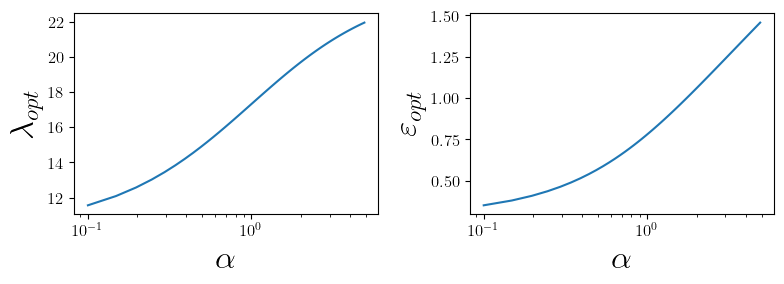

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].semilogx(alpha_list_th, lamb_eff[1]);
# plt.plot(alpha_list_th, epsilon_eff[0]);
axs[0].set_xlabel(r'$\alpha$', fontsize=24)
axs[0].set_ylabel(r'$\lambda_{opt}$', fontsize=24)

axs[1].semilogx(alpha_list_th, epsilon_eff[0]);
axs[1].set_xlabel(r'$\alpha$', fontsize=24)
axs[1].set_ylabel(r'$\varepsilon_{opt}$', fontsize=24)

plt.tight_layout()
plt.savefig('./figures/optimal_lambda_and_epsilon.pdf')